In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('email.csv')
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
data.shape

(5572, 5)

In [4]:
data['v1'][0]

'ham'

In [5]:
data['v2'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [6]:
data['v2'][2]

"Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"

In [7]:
data['v1'].value_counts()

v1
ham     4825
spam     747
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='v1'>

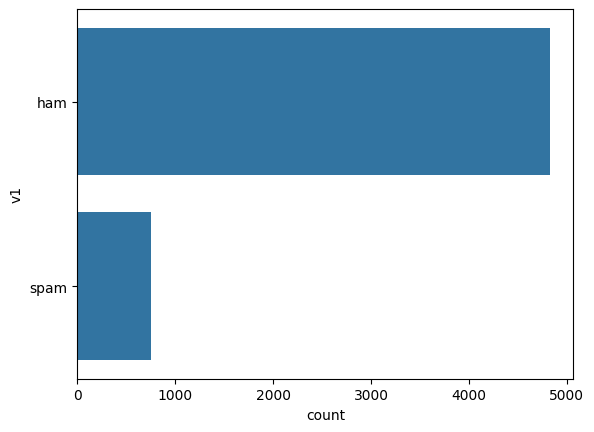

In [8]:
sns.countplot(data['v1'])

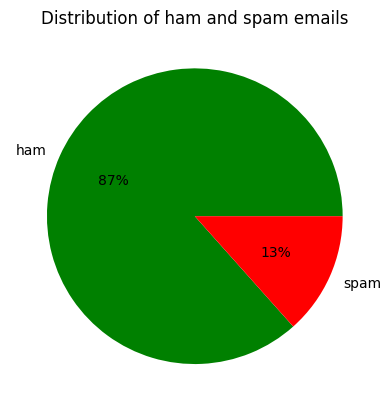

In [9]:
# Declaring data
df = data['v1'].value_counts()

# labels for data, replace with your own
keys = ['ham', 'spam']

# Declaring exploding pie
explode = [0, 0]

# Define Seaborn color palette to use
palette_color = ['green', 'red']

# Plotting data on chart
plt.pie(df, labels=keys, colors=palette_color, explode=explode, autopct='%.0f%%')
 
# Adding title to the chart
plt.title('Distribution of ham and spam emails')

# Displaying chart
plt.show() 

# Separate in X and Y

In [10]:
x = data['v2'].values              # x for features and y for labels
y = data['v1'].values              

In [11]:
y

array(['ham', 'ham', 'spam', ..., 'ham', 'ham', 'ham'], dtype=object)

# Train-Test-Split

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [13]:
X_train.shape

(4457,)

In [14]:
X_test.shape

(1115,)

In [15]:
y_train.shape

(4457,)

In [16]:
y_test.shape

(1115,)

# Preprocessing

In [17]:
from sklearn.feature_extraction.text import CountVectorizer

In [18]:
cv = CountVectorizer()

# Training by ML Algorithm

In [19]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
nb = MultinomialNB()

In [20]:
pipe = make_pipeline(cv, nb)

In [21]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('countvectorizer', CountVectorizer()),
                ('multinomialnb', MultinomialNB())])

In [22]:
y_pred = pipe.predict(X_test)

In [23]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_pred, y_test)*100)

98.65470852017937


# Saving the Model for Deployment

In [24]:
#save the model
import pickle 
filename = 'savemodel.sav'
pickle.dump(pipe, open(filename, 'wb'))

In [25]:
load_model = pickle.load(open(filename, 'rb'))

In [26]:
load_model.predict(["We are waiting for your reply in watts"])

array(['ham'], dtype='<U4')

In [27]:
import numpy as np
import pandas as pd
input_data = ("Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's")

#changing the input data to numpy array
input_data_as_numpy_array = np.array(input_data)

#reshaping the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1)

prediction = load_model.predict(input_data_reshaped)
print(prediction)


['spam']
